# 数据爬取与语音合成

以python的网站数据爬取，并根据网站数据的内容调用百度音频合成接口进行生成音频文件

## 一.基础工作

在百度AI注册一个账号，获取我们需要的应用

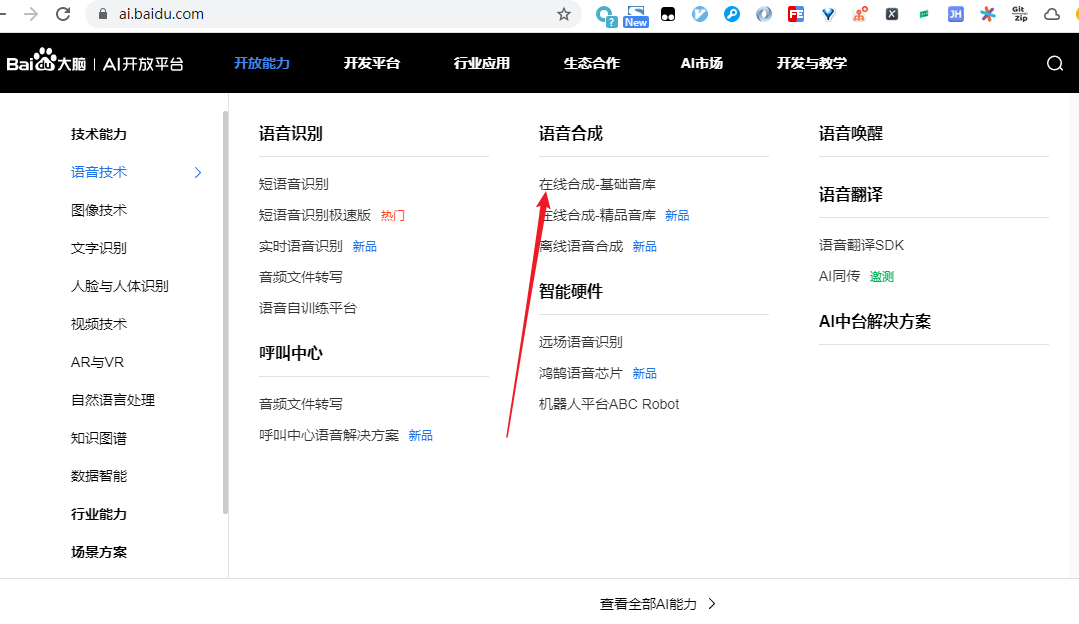

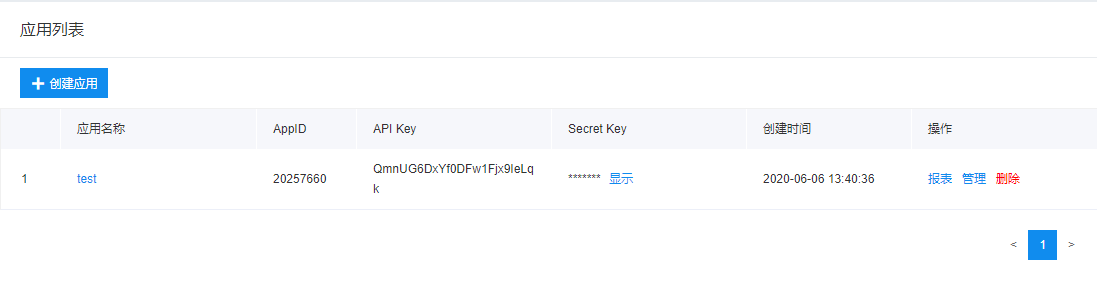

## 二.API函数接口的搭建

In [ ]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

# baidu_api.py

import os

from aip import AipSpeech

APP_ID = '20257660'
API_KEY = 'QmnUG6DxYf0DFw1Fjx9IeLqk'
SECRET_KEY = '******'

client = AipSpeech(APP_ID,API_KEY,SECRET_KEY)

def baidu(title,content):

    result = client.synthesis(content,'zh',1,{'vol':5})

    filename = os.path.join('./static/',title+'.mp3')

    if not isinstance(result,dict):
        with open(filename,'wb') as f:
            f.write(result)
        print(filename+"已存入")

## 三.网站数据爬虫

我们爬取网站：https://duanziwang.com/ 的数据

In [ ]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

# spider.py

import requests
from baidu_api import baidu
from lxml import etree

headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'
}


def parse(url):

    response = requests.get(url,headers=headers)

    response.encoding = 'utf-8'

    html = response.text

    root = etree.HTML(html)

    parse_html(root)


def parse_html(root):

    article_list = root.xpath('/html/body/section/div/div/main/article')

    for article in article_list:

        title = article.xpath('./div[1]/h1/a/text()')[0]
        content = article.xpath('./div[2]/pre/code/text()')[0]

        baidu(title,content)



def main():
    base_url = 'https://duanziwang.com/page/{}/'

    for i in range(2,5):
        url = base_url.format(i)

        parse(url)


if __name__=="__main__":

    main()

## 四.服务器搭建

使用flask进行网站搭建

In [ ]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Author LQ6H

# server.py

from flask import Flask,render_template
import os


app = Flask(__name__)

@app.route('/test')
def index():
    filepath_list = os.listdir('./static')
    path_list = []
    for path in filepath_list:
        path = '/static/'+path
        path_list.append(path)

    print(path_list)

    return render_template('./main.html',path_list=path_list)

if __name__ == "__main__":
    app.run(debug=True)


## 六.主页展示

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>段子</title>
</head>
<body>
<h1>hello</h1>

         {% for path in path_list %}
         <audio controls>
            <source src="{{path}}" type="audio/mp3" />
        </audio>
        <h5>{{path}}</h5><br>

         {% endfor %}


</body>
</html>

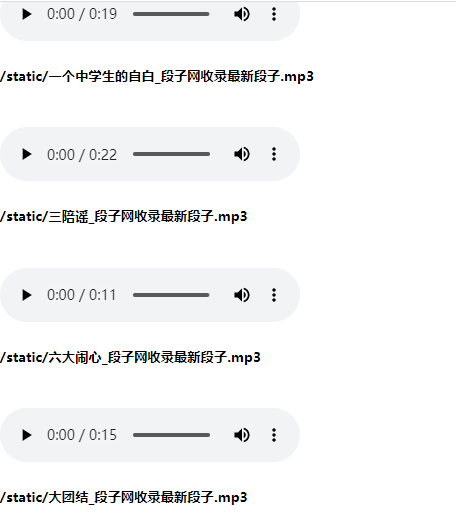